In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pa
import plotly.express as px

## Paths

In [10]:
humann_path = '/pita/users/hila/biobakery_workflows/output_data/30_Aug_2021_HMP2_metagenome/humann/merged'
datasets_path = '/pita/users/hila/analysis/datasets'
#gene_families_path = os.path.join(humann_path, 'genefamilies_relab_unstratified.tsv')
gene_families_path = os.path.join(datasets_path, 'hmp2_mgx_genefamilies_wo_bad_samples.tsv')
gene_families_path

'/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_wo_bad_samples.tsv'

In [12]:
# filtered from: hmp2_mgx_genefamilies_wo_bad_samples.tsv
output_fname = 'hmp2_mgx_genefamilies_filtered_10_perc_detection.tsv'
output_path = os.path.join(datasets_path, output_fname)
output_path

'/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_filtered_10_perc_detection.tsv'

In [14]:
# filtered from: hmp2_mgx_genefamilies_wo_bad_samples.tsv
output_fname = 'hmp2_mgx_genefamilies_filtered_20_perc_detection.tsv'
output_path = os.path.join(datasets_path, output_fname)
output_path

'/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_filtered_20_perc_detection.tsv'

In [17]:
# filtered from: hmp2_mgx_genefamilies_wo_bad_samples.tsv
output_fname = 'hmp2_mgx_genefamilies_filtered_30_perc_detection.tsv'
output_path = os.path.join(datasets_path, output_fname)
output_path

'/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_filtered_30_perc_detection.tsv'

In [20]:
# filtered from: hmp2_mgx_genefamilies_wo_bad_samples.tsv
output_fname = 'hmp2_mgx_genefamilies_filtered_50_perc_detection.tsv'
output_path = os.path.join(datasets_path, output_fname)
output_path

'/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_filtered_50_perc_detection.tsv'

In [4]:
output_fname_avg = 'hmp2_mgx_genefamilies_filtered_avg1e7_10perc_detect.tsv'
output_path_avg = os.path.join(datasets_path, output_fname_avg)
output_path_avg 

In [12]:
output_fname_avg = 'hmp2_mgx_genefamilies_filtered_avg1e8_10perc_detect.tsv'
output_fname_avg = 'hmp2_mgx_genefamilies_filtered_avg1e9_10perc_detect.tsv'
output_path_avg = os.path.join(datasets_path, output_fname_avg)
output_path_avg 

'/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_filtered_avg1e9_10perc_detect.tsv'

In [1]:
gene_families_path = '/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_stratified_significant_8359_features.tsv'
output_path = '/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_stratified_significant_8359_features_filtered_10_perc_detection.tsv'

In [2]:
# std/mean > 0.05
DETECTION_THRESHOLD = 0.1
#AVG_THRESHOLD = 1e-9
ifile = open(gene_families_path, 'r')
line = ifile.readline() # skipping the first line which is the header

ofile = open(output_path, 'w')
ofile.write(line) # write title

count = 0

while line:
    line = ifile.readline()
    abund = line.split("\t")[1:] # removing feature name, staying with abundance values only
    if (len(abund) == 0) | (len(abund) == 1):
        print("Reached EOF, abund: ", *abund)
        break
    abund[-1] = abund[-1].strip() # removing the '\n' character in the last abundance value.
    if count == 0:
        sample_size = len(abund)
    abund_num = [float(i) for i in abund] # turning abund list (str) into a float list
    #avg_abund = sum(abund_num)/sample_size # average value of features.
    zeros_amount = abund_num.count(0.0)
    # detected in at least DETECTION_THRESHOLD of the samples and the abundance average is bigger than AVG_THRESHOLD.
    if(zeros_amount/sample_size < (1-DETECTION_THRESHOLD)): #and avg_abund > AVG_THRESHOLD): 
        ofile.write(line)
        count += 1
        
            
ifile.close()
ofile.close()

print("num of features: ", count)

Reached EOF, abund: 
num of features:  13630


In [11]:
AVG_THRESHOLD

1e-08

num features of 20% detection: 134509


num features of 30% detection: 84754


In [20]:
len(abund)

1636

In [24]:
abund_num = [float(i) for i in abund]
abund_num.count(0.0)

1635

### Saving only columns with samples with enough reads

In [21]:
meta = pa.read_csv("/pita/users/hila/analysis/datasets/hmp2_metadata_mgx_mtx.tsv", sep = '\t')
meta

,External ID,Project,Participant ID,week_num,date_of_receipt,interval_days,visit_num,Age at diagnosis,sex,race,...,humann_genefamilies_relab_counts_mgx,humann_pathabundance_relab_counts_mgx,metaphlan_counts_mgx,raw_mtx,final_mtx,ratio_mtx,humann_ecs_relab_counts_mtx,humann_genefamilies_relab_counts_mtx,humann_pathabundance_relab_counts_mtx,metaphlan_counts_mtx
0,CSM5FZ3N_P,G79889,C3001,0,2014-03-14,0,4,28.0,Female,White,...,69258,190,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSM5FZ3R_P,G79894,C3001,2,2014-03-28,14,5,28.0,Female,White,...,86592,201,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CSM5YRY7_P,G79903,C3001,4,2014-04-15,18,6,28.0,Female,White,...,82561,224,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CSM5FZ3V_P,G79913,C3001,6,2014-04-28,13,7,28.0,Female,White,...,77158,202,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CSM5FZ4C_P,G79926,C3001,8,2014-05-09,11,8,28.0,Female,White,...,72447,191,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,PSMA26A1,G111931,P6038,24,2016-04-28,14,16,8.0,Female,White,...,102078,235,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,PSMA26A3,G110660,P6038,26,2016-05-12,14,18,8.0,Female,White,...,96878,234,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,PSMB4MC1,G111932,P6038,34,2016-07-08,8,22,8.0,Female,White,...,124070,248,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,PSMB4MC3,G111934,P6038,35,2016-07-20,12,23,8.0,Female,White,...,73585,189,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
meta.columns

Index(['External ID', 'Project', 'Participant ID', 'week_num',
       'date_of_receipt', 'interval_days', 'visit_num', 'Age at diagnosis',
       'sex', 'race', 'diagnosis', 'Antibiotics', 'Abdominal pain',
       'raw_pair_1_mgx', 'raw_pair_2_mgx', 'final_pair_1_mgx',
       'final_pair_2_mgx', 'humann_ecs_relab_counts_mgx',
       'humann_genefamilies_relab_counts_mgx',
       'humann_pathabundance_relab_counts_mgx', 'metaphlan_counts_mgx',
       'raw_mtx', 'final_mtx', 'ratio_mtx', 'humann_ecs_relab_counts_mtx',
       'humann_genefamilies_relab_counts_mtx',
       'humann_pathabundance_relab_counts_mtx', 'metaphlan_counts_mtx'],
      dtype='object')

In [22]:
bad_samples = meta.loc[(meta['final_pair_1_mgx'] <= 8000000) | (meta['final_pair_2_mgx'] <= 8000000), "External ID"].tolist()

In [8]:
len(bad_samples)

439

In [6]:
1636-439

1197

In [11]:
bad_samples[:10]

['CSM5FZ3N_P',
 'CSM67UGC',
 'CSM67UBR',
 'CSM67UDR_TR',
 'CSM67UDR',
 'CSM67UDY',
 'CSM79HLK',
 'CSM79HMN',
 'CSM5MCV1_P',
 'CSM5MCV5_P']

In [26]:
humann_path = '/pita/users/hila/biobakery_workflows/output_data/30_Aug_2021_HMP2_metagenome/humann/merged'
gene_families_path = os.path.join(humann_path, 'genefamilies_relab_unstratified.tsv')


In [3]:
datasets_path = '/pita/users/hila/analysis/datasets'
output_fname = 'hmp2_mgx_genefamilies_wo_bad_samples.tsv'
output_path = os.path.join(datasets_path, output_fname)

In [58]:
ifile = open(gene_families_path, 'r')
line = ifile.readline() # header
sample_names = line.split('\t') # this includes the first column which is the feature name
clean_sample_names = [i.replace('_Abundance-RPKs', '') for i in sample_names] # this still includes the 1st column.
clean_sample_names[-1] = clean_sample_names[-1].strip() # remove the last '\n' character
bad_idx = [i for i in range(len(clean_sample_names)) if clean_sample_names[i] in bad_samples]

# removing the bad samples from the header
for index in sorted(bad_idx, reverse=True):
    del clean_sample_names[index]

updated_header = '\t'.join(clean_sample_names)
ofile = open(output_path, 'w')
ofile.write(updated_header + '\n')

while line:
    line = ifile.readline()
    abund = line.split("\t") 
    if len(abund) == 0 | len(abund) == 1:
        print("abund: ", *abund)
        break 
    abund[-1] = abund[-1].strip() # the reason why I remove '\n' is so I would add it later without worring double \n characters if last sample is not removed.
    for index in sorted(bad_idx, reverse=True):
        try: 
            del abund[index]
        except:
            print("index: ", index, "\nabund: ", *abund)
    updated_line = '\t'.join(abund)
    ofile.write(updated_line + '\n') 

ifile.close()
ofile.close()
print('done!')

## other stuff

In [24]:
path = 'hmp2_mgx_genefamilies_filtered_10_perc_detection.tsv'
ifile_path = os.path.join(datasets_path, path)

In [25]:
# Getting average abundance of each feature
ifile = open(ifile_path, 'r')
list_avg = []
line = ifile.readline()
while line:
    line = ifile.readline()
    abund = line.split("\t")[1:] 
    if (len(abund) == 0) | (len(abund) == 1):
        print("EOF, abund: ", *abund)
        break
    abund[-1] = abund[-1].strip() 
    float_abund = [float(i) for i in abund]
    avg_abund = sum(float_abund)/len(float_abund)
    list_avg.append(avg_abund)

ifile.close()

EOF, abund: 


In [26]:
len(line)

0

In [28]:
len(list_avg)

279547

(array([2.377315e+06, 3.600000e+01, 6.000000e+00, 6.000000e+00,
        4.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.        , 0.00028515, 0.0005703 , 0.00085546, 0.00114061,
        0.00142576, 0.00171091, 0.00199606, 0.00228121, 0.00256637,
        0.00285152]),
 <BarContainer object of 10 artists>)

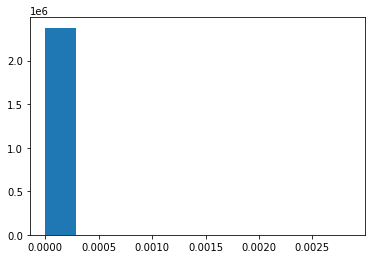

In [9]:
plt.hist(list_avg)

In [ ]:
fig = px.histogram()

In [5]:
len(list_avg)

2377370

In [7]:
list_avg[:10]

[1.2322890559732664e-10,
 2.181111111111111e-10,
 2.8312197159565584e-10,
 1.891971595655806e-09,
 2.3244026733500417e-10,
 8.711111111111111e-10,
 7.788930659983292e-10,
 0.0,
 5.402439431913117e-11,
 4.025616541353384e-09]

In [52]:
abund

['']

In [53]:
line

''

In [55]:
line == '\n'

False

## Printing specific species

In [17]:
ipath = '/pita/users/hila/biobakery_workflows/output_data/30_Aug_2021_HMP2_metagenome/humann/merged/genefamilies_relab_stratified.tsv'

In [18]:
#opath = '/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_stratified_specific_species.tsv'
#opath = '/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_stratified_specific_features.tsv'
#opath = '/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_stratified_eubacterium_rectale.tsv'
opath = '/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_stratified_significant_8359_features.tsv' # the signficant features found for 'hmp2_mgx_genefamilies_filtered_10_perc_detection.tsv' with fdr 0.1 and weeks 0,1,2

In [19]:
#specific_species_raw = ['Lachnospiraceae_incertae', 'Alistipes', 'Odoribacter', 'Enterocloster_bolteae', 'Bacteroides_ovatus'] # 'Clostridium'
#specific_species_raw = ['A0A395UYY3', 'A0A396FNV6', 'A0A396FME8']
#specific_species_raw = ['s__Eubacterium_rectale']


In [23]:
species_file = open('/pita/users/hila/analysis/datasets/hmp2_mgx_genefamilies_significant_features.txt','r')
specific_species_raw = []

s = species_file.readline()
while s:
    specific_species_raw.append(s.rstrip())
    s = species_file.readline()
species_file.close()

specific_species_raw

['UniRef90_A0A377U364',
 'UniRef90_A0A069SCD4',
 'UniRef90_A5ZX99',
 'UniRef90_A0A174W4V4',
 'UniRef90_A0A166TCC6',
 'UniRef90_U2SNF5',
 'UniRef90_A0A174RQ67',
 'UniRef90_A0A396F2B4',
 'UniRef90_F7LRA3',
 'UniRef90_A0A174AXR8',
 'UniRef90_G5SMZ1',
 'UniRef90_A0A3E5HGN4',
 'UniRef90_A0A015U6C8',
 'UniRef90_A0A1I4Q826',
 'UniRef90_K9ECK6',
 'UniRef90_A0A173UIQ6',
 'UniRef90_A0A096D5B2',
 'UniRef90_A0A3E4H119',
 'UniRef90_A0A396AJZ8',
 'UniRef90_R9HIH9',
 'UniRef90_A0A3E4R9Q4',
 'UniRef90_K1U3P7',
 'UniRef90_A0A069SIA9',
 'UniRef90_A0A0A2FIY8',
 'UniRef90_A0A396EGQ2',
 'UniRef90_A0A0A2FIX9',
 'UniRef90_A0A0A2FLC7',
 'UniRef90_F7MBL8',
 'UniRef90_G8UJ64',
 'UniRef90_D1K7U3',
 'UniRef90_A0A3E4QX24',
 'UniRef90_F7MBM2',
 'UniRef90_R5G8N1',
 'UniRef90_A0A174IFA8',
 'UniRef90_B3JLP5',
 'UniRef90_B3JLP0',
 'UniRef90_A0A2A6ZXT8',
 'UniRef90_D4K202',
 'UniRef90_A0A2A7B4L8',
 'UniRef90_A0A329UFU5',
 'UniRef90_A0A081TKX7',
 'UniRef90_A0A081TKX8',
 'UniRef90_A0A081U0V8',
 'UniRef90_A0A3E5EY93',
 'Un

In [24]:
len(specific_species_raw)

8359

In [25]:
specific_species = [i.lower() for i in specific_species_raw]

In [26]:
# write lines of stratified features that are found in specific_species to opath
ifile = open(ipath, 'r')
line = ifile.readline() # header
sample_names = line.split('\t') # this includes the first column which is the feature name
clean_sample_names = [i.replace('_Abundance-RPKs', '') for i in sample_names] # this still includes the 1st column.
clean_sample_names[-1] = clean_sample_names[-1].strip() # remove the last '\n' character
bad_idx = [i for i in range(len(clean_sample_names)) if clean_sample_names[i] in bad_samples]

# removing the bad samples from the header
for index in sorted(bad_idx, reverse=True):
    del clean_sample_names[index]

updated_header = '\t'.join(clean_sample_names)
ofile = open(opath, 'w')
ofile.write(updated_header + '\n')

while line:
    line = ifile.readline()
    abund = line.split("\t") 
    if len(abund) == 0 | len(abund) == 1:
        print("abund: ", *abund)
        break 
    abund[-1] = abund[-1].strip() # the reason why I remove '\n' is so I would add it later without worring double \n characters if last sample is not removed.
    
    for s in specific_species:
        if s in abund[0].lower(): # if the feature name contains the specific species name
            for index in sorted(bad_idx, reverse=True):
                try: 
                    del abund[index]
                except:
                    print("index: ", index, "\nabund: ", *abund)
            updated_line = '\t'.join(abund)
            ofile.write(updated_line + '\n')

ifile.close()
ofile.close()
print('done!')

abund:  
done!


In [23]:
abund

['UniRef90_A0A009DWL0|unclassified',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1.47505e-07',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',

In [25]:
'A0A' in abund[0] 


True

# Saving mtx/mgx ratio tables

In [2]:
meta = pa.read_csv("/pita/users/hila/analysis/datasets/hmp2_metadata_mgx_mtx.tsv", sep = '\t')
meta

,External ID,Project,Participant ID,week_num,date_of_receipt,interval_days,visit_num,Age at diagnosis,sex,race,...,humann_genefamilies_relab_counts_mgx,humann_pathabundance_relab_counts_mgx,metaphlan_counts_mgx,raw_mtx,final_mtx,ratio_mtx,humann_ecs_relab_counts_mtx,humann_genefamilies_relab_counts_mtx,humann_pathabundance_relab_counts_mtx,metaphlan_counts_mtx
0,CSM5FZ3N_P,G79889,C3001,0,2014-03-14,0,4,28.0,Female,White,...,69258,190,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSM5FZ3R_P,G79894,C3001,2,2014-03-28,14,5,28.0,Female,White,...,86592,201,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CSM5YRY7_P,G79903,C3001,4,2014-04-15,18,6,28.0,Female,White,...,82561,224,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CSM5FZ3V_P,G79913,C3001,6,2014-04-28,13,7,28.0,Female,White,...,77158,202,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CSM5FZ4C_P,G79926,C3001,8,2014-05-09,11,8,28.0,Female,White,...,72447,191,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,PSMA26A1,G111931,P6038,24,2016-04-28,14,16,8.0,Female,White,...,102078,235,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,PSMA26A3,G110660,P6038,26,2016-05-12,14,18,8.0,Female,White,...,96878,234,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,PSMB4MC1,G111932,P6038,34,2016-07-08,8,22,8.0,Female,White,...,124070,248,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,PSMB4MC3,G111934,P6038,35,2016-07-20,12,23,8.0,Female,White,...,73585,189,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bad_samples = meta.loc[(meta['final_pair_1_mgx'] <= 8000000) | (meta['final_pair_2_mgx'] <= 8000000) | (meta['final_mtx'] <= 5000000), "External ID"].tolist()

In [21]:
ipath = '/pita/users/hila/biobakery_workflows/output_data/10_Jul_2022_hmp2_mgx_mtx_first_weeks/humann/rna_dna_norm/genes/rna_dna_relative_expression_unstratified.tsv'

In [23]:
opath = '/pita/users/hila/analysis/datasets/hmp2_mtx_genefamilies_filtered_10_perc_detection.tsv'

In [17]:
import math

In [30]:
# write lines of unstratified features with filtered samples, with features detected in at least X samples.
DETECTION_THRESHOLD = 0.1

ifile = open(ipath, 'r')
line = ifile.readline() # header
sample_names = line.split('\t') # this includes the first column which is the feature name
clean_sample_names = [i.replace('_Abundance-RPKs', '') for i in sample_names] # this still includes the 1st column.
clean_sample_names[-1] = clean_sample_names[-1].strip() # remove the last '\n' character
bad_idx = [i for i in range(len(clean_sample_names)) if clean_sample_names[i] in bad_samples]

# removing the bad samples from the header
for index in sorted(bad_idx, reverse=True):
    del clean_sample_names[index]

updated_header = '\t'.join(clean_sample_names)
ofile = open(opath, 'w')
ofile.write(updated_header + '\n')
count = 0

while line:
    line = ifile.readline()
    line_lst = line.split("\t") 
    if len(line_lst) == 0 | len(line_lst) == 1:
        print("line: ", *line_lst)
        break 
    line_lst[-1] = line_lst[-1].strip() # the reason why I remove '\n' is so I would add it later without worring double \n characters if last sample is not removed.
    
    for index in sorted(bad_idx, reverse=True):
        try: 
            del line_lst[index]
        except:
            print("index: ", index, "\nline: ", *line_lst)
        updated_line = '\t'.join(line_lst)
    
    if count == 0:
        sample_size = len(line_lst[1:]) # also removing the first column which is the feature name
    try:
        abund_num = [float(i) for i in line_lst[1:]] # turning abund list (str) into a float list
    except:
        print("There was an error, current line: ", line_lst)
        break
    #avg_abund = sum(abund_num)/sample_size # average value of features.
    zeros_amount = abund_num.count(0.0)
    nan_amount = sum(math.isnan(x) for x in abund_num)
    inf_amount = sum(math.isinf(x) for x in abund_num)
    # detected in at least DETECTION_THRESHOLD of the samples and the abundance average is bigger than AVG_THRESHOLD.
    if((zeros_amount + nan_amount + inf_amount)/sample_size < (1-DETECTION_THRESHOLD)): #and avg_abund > AVG_THRESHOLD): 
        ofile.write(updated_line + '\n')
        count += 1


ifile.close()
ofile.close()
print('done!')

line:  
done!


In [ ]:
[1:] # removing feature name, staying with abundance values only

In [31]:
print('original number of gene families: 1173361')
print('number of gene families after filtering: ', count)

original number of gene families: 1173362
number of gene families after filtering:  46114


In [18]:
tmp = [123, float("inf"), 34]

In [12]:
import numpy as np

In [14]:
tmp.count("NaN")

0

In [15]:
import math

In [19]:
sum(math.isinf(x) for x in tmp)

1

In [28]:
[float(i) for i in ['NaN', 'NaN', 'NaN']]

[nan, nan, nan]

In [29]:
tmp[-1]

34